In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
hx_mitx_dataset2013 = pd.read_csv('../MOOC_Files/HXPC13_DI_v3_11-13-2019.csv')

In [3]:
hx_mitx_dataset2013.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,12/19/12,11/17/13,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2/8/13,11/17/13,NaN,16.0,NaN,NaN,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,1/1/13,5/14/13,42.0,6.0,NaN,3.0,0,NaN,NaN
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2/18/13,3/17/13,70.0,3.0,NaN,3.0,0,NaN,NaN
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,0.07,1/24/13,8/3/13,175.0,9.0,NaN,7.0,0,NaN,NaN


In [4]:
hx_mitx_dataset2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338223 entries, 0 to 338222
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   course_id          338223 non-null  object 
 1   userid_DI          338223 non-null  object 
 2   registered         338223 non-null  int64  
 3   viewed             338223 non-null  int64  
 4   explored           338223 non-null  int64  
 5   certified          338223 non-null  int64  
 6   final_cc_cname_DI  338223 non-null  object 
 7   LoE_DI             294104 non-null  object 
 8   YoB                299719 non-null  float64
 9   gender             305262 non-null  object 
 10  grade              312333 non-null  object 
 11  start_time_DI      338223 non-null  object 
 12  last_event_DI      185992 non-null  object 
 13  nevents            178945 non-null  float64
 14  ndays_act          195713 non-null  float64
 15  nplay_video        33277 non-null   float64
 16  nc

In [5]:
from pandas_profiling import ProfileReport

In [6]:
hx_mitx_profile = ProfileReport(hx_mitx_dataset2013)
hx_mitx_profile
hx_mitx_profile.to_file("hx_mitx_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
hx_mitx_dataset2013.describe()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,338223.0,338223.000000,338223.000000,338223.000000,299719.000000,178945.000000,195713.000000,33277.000000,193758.000000,338223.000000,0.0,77385.0
mean,1.0,0.573160,0.060978,0.019425,1984.044725,231.992702,4.864899,146.964179,3.487727,0.011421,NaN,1.0
std,0.0,0.494619,0.239289,0.138014,9.603730,939.101311,9.187189,518.468002,4.720403,0.150186,NaN,0.0
min,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,1.0,0.000000,0.000000,0.000000,1980.000000,3.000000,1.000000,4.000000,1.000000,0.000000,NaN,1.0
50%,1.0,1.000000,0.000000,0.000000,1986.000000,17.000000,2.000000,17.000000,2.000000,0.000000,NaN,1.0
75%,1.0,1.000000,0.000000,0.000000,1991.000000,95.000000,4.000000,74.000000,3.000000,0.000000,NaN,1.0
max,1.0,1.000000,1.000000,1.000000,2013.000000,43880.000000,176.000000,34596.000000,34.000000,7.000000,NaN,1.0


In [10]:
hx_mitx_dataset2013.value_counts('final_cc_cname_DI')

final_cc_cname_DI
United States                             100152
Unknown/Other                              70208
India                                      30635
Other Europe                               19293
Other Africa                               12631
United Kingdom                             11562
Brazil                                      8491
Canada                                      7776
Other Middle East/Central Asia              7087
Other South Asia                            6666
Nigeria                                     4610
Spain                                       4465
Pakistan                                    4066
Other South America                         3921
Germany                                     3763
Australia                                   3746
Russian Federation                          3646
Other East Asia                             3612
Greece                                      3557
Egypt                                       3401
Ph

In [ ]:
#need to column to country_region

In [11]:
hx_mitx_dataset2013.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,12/19/12,11/17/13,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2/8/13,11/17/13,NaN,16.0,NaN,NaN,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,1/1/13,5/14/13,42.0,6.0,NaN,3.0,0,NaN,NaN
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2/18/13,3/17/13,70.0,3.0,NaN,3.0,0,NaN,NaN
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,0.07,1/24/13,8/3/13,175.0,9.0,NaN,7.0,0,NaN,NaN


In [12]:
hx_mitx_dataset2013.value_counts('nforum_posts')

nforum_posts
0    335591
1      1816
2       568
3       147
4        56
5        29
6        11
7         5
dtype: int64

In [14]:
hx_mitx_dataset2013.value_counts('grade')

grade
0       288675
0.01      2807
          2695
0.04      1587
1         1573
         ...  
0.46        38
0.57        37
0.47        36
0.49        33
1.01         6
Length: 103, dtype: int64

In [9]:
hx_mitx_dataset2013.head()

,Course-id,Course,School,userid_DI,Registered,Viewed,Explored,Certified,Engagement,Countries,...,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,random_number
0,HarvardX/ER22x/2013_Spring,JusticeX,HarvardX,MHxPC130341010,1,1,0,0,1,United States,...,1/20/13,7/8/13,246.0,4.0,NaN,9.0,0,NaN,NaN,0.000002
1,MITx/6.00x/2013_Spring,CS2-MIT,MITx,MHxPC130451014,1,1,0,0,1,Other Europe,...,3/22/13,3/22/13,43.0,1.0,11.0,1.0,0,NaN,NaN,0.000003
2,MITx/14.73x/2013_Spring,Poverty,MITx,MHxPC130255198,1,1,0,0,1,United States,...,1/27/13,2/28/13,198.0,6.0,36.0,2.0,0,NaN,NaN,0.000005
3,MITx/8.02x/2013_Spring,E&M,MITx,MHxPC130563002,1,1,0,0,1,Morocco,...,2/13/13,4/13/13,13.0,5.0,3.0,2.0,0,NaN,NaN,0.000014
4,HarvardX/CB22x/2013_Spring,HerosX,HarvardX,MHxPC130055735,1,1,0,0,1,United States,...,5/1/13,5/19/13,249.0,8.0,NaN,5.0,0,NaN,NaN,0.000020


In [22]:
hx_mitx_dataset2013.isnull().sum()

course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                44119
YoB                   38504
gender                32961
grade                 25890
start_time_DI             0
last_event_DI        152231
nevents              159278
ndays_act            142510
nplay_video          304946
nchapters            144465
nforum_posts              0
roles                338223
incomplete_flag      260838
dtype: int64

In [ ]:
#need to think about deleting lat row

In [30]:
hx_mitx_dataset2013_mod = hx_mitx_dataset2013.drop(['roles','incomplete_flag'], axis=1)
hx_mitx_dataset2013_mod

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,12/19/12,11/17/13,NaN,9.0,NaN,NaN,0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2/8/13,11/17/13,NaN,16.0,NaN,NaN,0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,1/1/13,5/14/13,42.0,6.0,NaN,3.0,0
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2/18/13,3/17/13,70.0,3.0,NaN,3.0,0
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,0.07,1/24/13,8/3/13,175.0,9.0,NaN,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338218,HarvardX/PH278x/2013_Spring,MHxPC130087143,1,0,0,0,Greece,Bachelor's,1987.0,m,0,8/14/13,8/27/13,2.0,1.0,NaN,NaN,0
338219,HarvardX/PH278x/2013_Spring,MHxPC130430900,1,1,0,0,India,Master's,1990.0,m,0,8/14/13,8/28/13,37.0,3.0,NaN,1.0,0
338220,HarvardX/PH278x/2013_Spring,MHxPC130004339,1,0,0,0,Other South America,Master's,1988.0,m,0,8/14/13,NaN,NaN,1.0,NaN,NaN,0
338221,HarvardX/PH278x/2013_Spring,MHxPC130388295,1,0,0,0,United States,Master's,1986.0,m,NaN,9/5/13,NaN,NaN,NaN,NaN,NaN,0


In [31]:
hx_mitx_dataset2013_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338223 entries, 0 to 338222
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   course_id          338223 non-null  object 
 1   userid_DI          338223 non-null  object 
 2   registered         338223 non-null  int64  
 3   viewed             338223 non-null  int64  
 4   explored           338223 non-null  int64  
 5   certified          338223 non-null  int64  
 6   final_cc_cname_DI  338223 non-null  object 
 7   LoE_DI             294104 non-null  object 
 8   YoB                299719 non-null  float64
 9   gender             305262 non-null  object 
 10  grade              312333 non-null  object 
 11  start_time_DI      338223 non-null  object 
 12  last_event_DI      185992 non-null  object 
 13  nevents            178945 non-null  float64
 14  ndays_act          195713 non-null  float64
 15  nplay_video        33277 non-null   float64
 16  nc

In [ ]:
#Let's see how much data we lose if we drop all rows with missing values 

In [ ]:
# next step: 
- codebook ( transmettre) - changer la
- analyse exploratoire 
- nombre de outliers
- distribution 
- plan d'analyse 
 - colonne par colonne
    - codebook par types de variables
    - nombre de valeurs manquant 
    - la problematique
    

- Problématique
- Code book (définition, type de variables, nombre de valeurs manquantes, outliers, distribution)

In [32]:
hx_mitx_drop = hx_mitx_dataset2013_mod.dropna()

In [33]:
hx_mitx_drop.shape

(25318, 18)

In [34]:
hx_mitx_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25318 entries, 258436 to 338217
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          25318 non-null  object 
 1   userid_DI          25318 non-null  object 
 2   registered         25318 non-null  int64  
 3   viewed             25318 non-null  int64  
 4   explored           25318 non-null  int64  
 5   certified          25318 non-null  int64  
 6   final_cc_cname_DI  25318 non-null  object 
 7   LoE_DI             25318 non-null  object 
 8   YoB                25318 non-null  float64
 9   gender             25318 non-null  object 
 10  grade              25318 non-null  object 
 11  start_time_DI      25318 non-null  object 
 12  last_event_DI      25318 non-null  object 
 13  nevents            25318 non-null  float64
 14  ndays_act          25318 non-null  float64
 15  nplay_video        25318 non-null  float64
 16  nchapters       

In [35]:
hx_mitx_drop.describe()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts
count,25318.0,25318.0,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000
mean,1.0,1.0,0.181965,0.090923,1982.751718,973.321115,9.365234,167.390789,4.207678,0.029702
std,0.0,0.0,0.385824,0.287506,8.387322,2094.197327,13.403477,550.749737,4.128921,0.213653
min,1.0,1.0,0.000000,0.000000,1942.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,1.0,1.0,0.000000,0.000000,1979.000000,60.000000,2.000000,5.000000,2.000000,0.000000
50%,1.0,1.0,0.000000,0.000000,1985.000000,195.000000,4.000000,21.000000,2.000000,0.000000
75%,1.0,1.0,0.000000,0.000000,1988.000000,772.000000,10.000000,92.000000,5.000000,0.000000
max,1.0,1.0,1.000000,1.000000,2013.000000,43880.000000,159.000000,34596.000000,16.000000,6.000000


array([[<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'viewed'}>,
        <AxesSubplot:title={'center':'explored'}>],
       [<AxesSubplot:title={'center':'certified'}>,
        <AxesSubplot:title={'center':'YoB'}>,
        <AxesSubplot:title={'center':'nevents'}>],
       [<AxesSubplot:title={'center':'ndays_act'}>,
        <AxesSubplot:title={'center':'nplay_video'}>,
        <AxesSubplot:title={'center':'nchapters'}>],
       [<AxesSubplot:title={'center':'nforum_posts'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

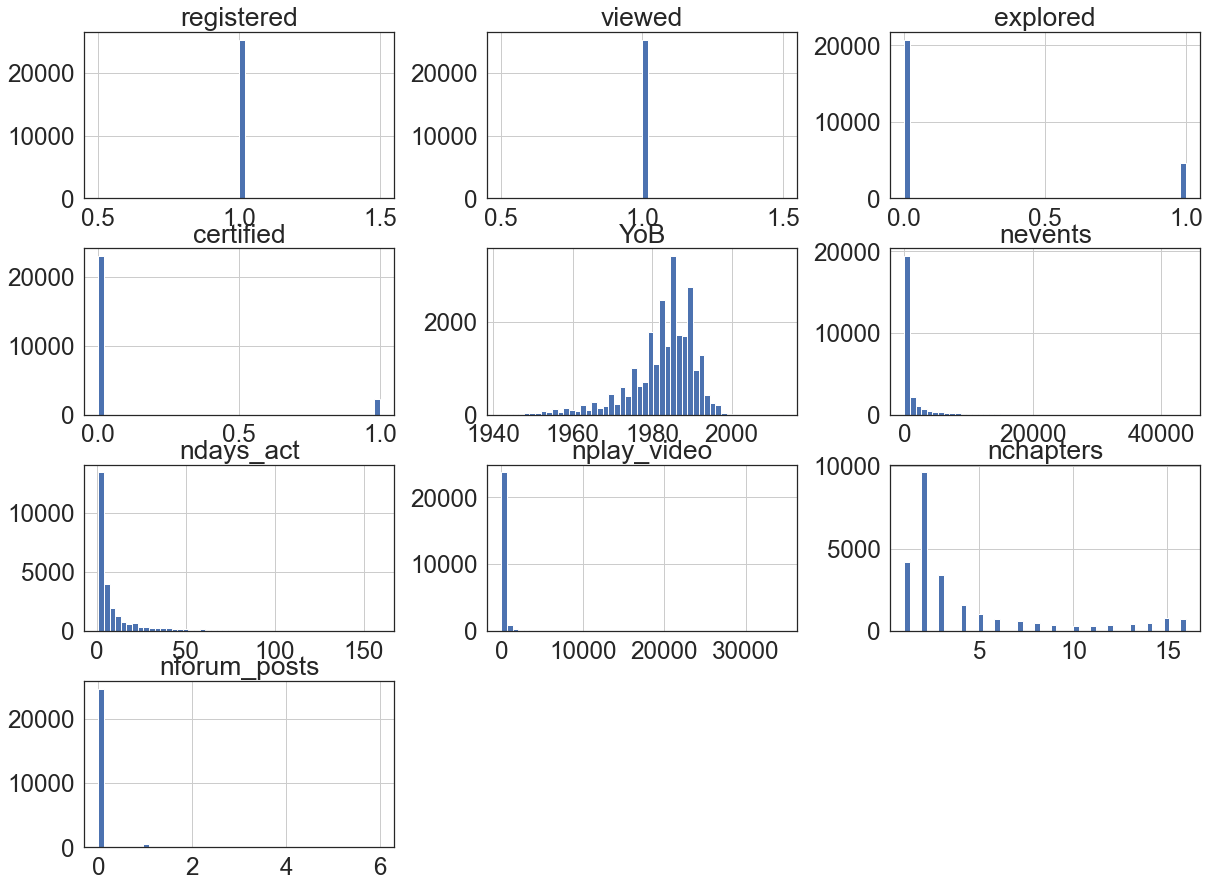

In [40]:
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn
hx_mitx_drop.hist(figsize=(20,15), bins=50)

In [41]:
corr_matrix = hx_mitx_drop.corr()
corr_matrix.head()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts
registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viewed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
explored,NaN,NaN,1.000000,0.649182,-0.010841,0.667047,0.729786,0.417863,0.897184,0.086807
certified,NaN,NaN,0.649182,1.000000,0.012589,0.607096,0.648960,0.368852,0.654796,0.062776
YoB,NaN,NaN,-0.010841,0.012589,1.000000,-0.042281,-0.056689,-0.045701,-0.033555,0.018972


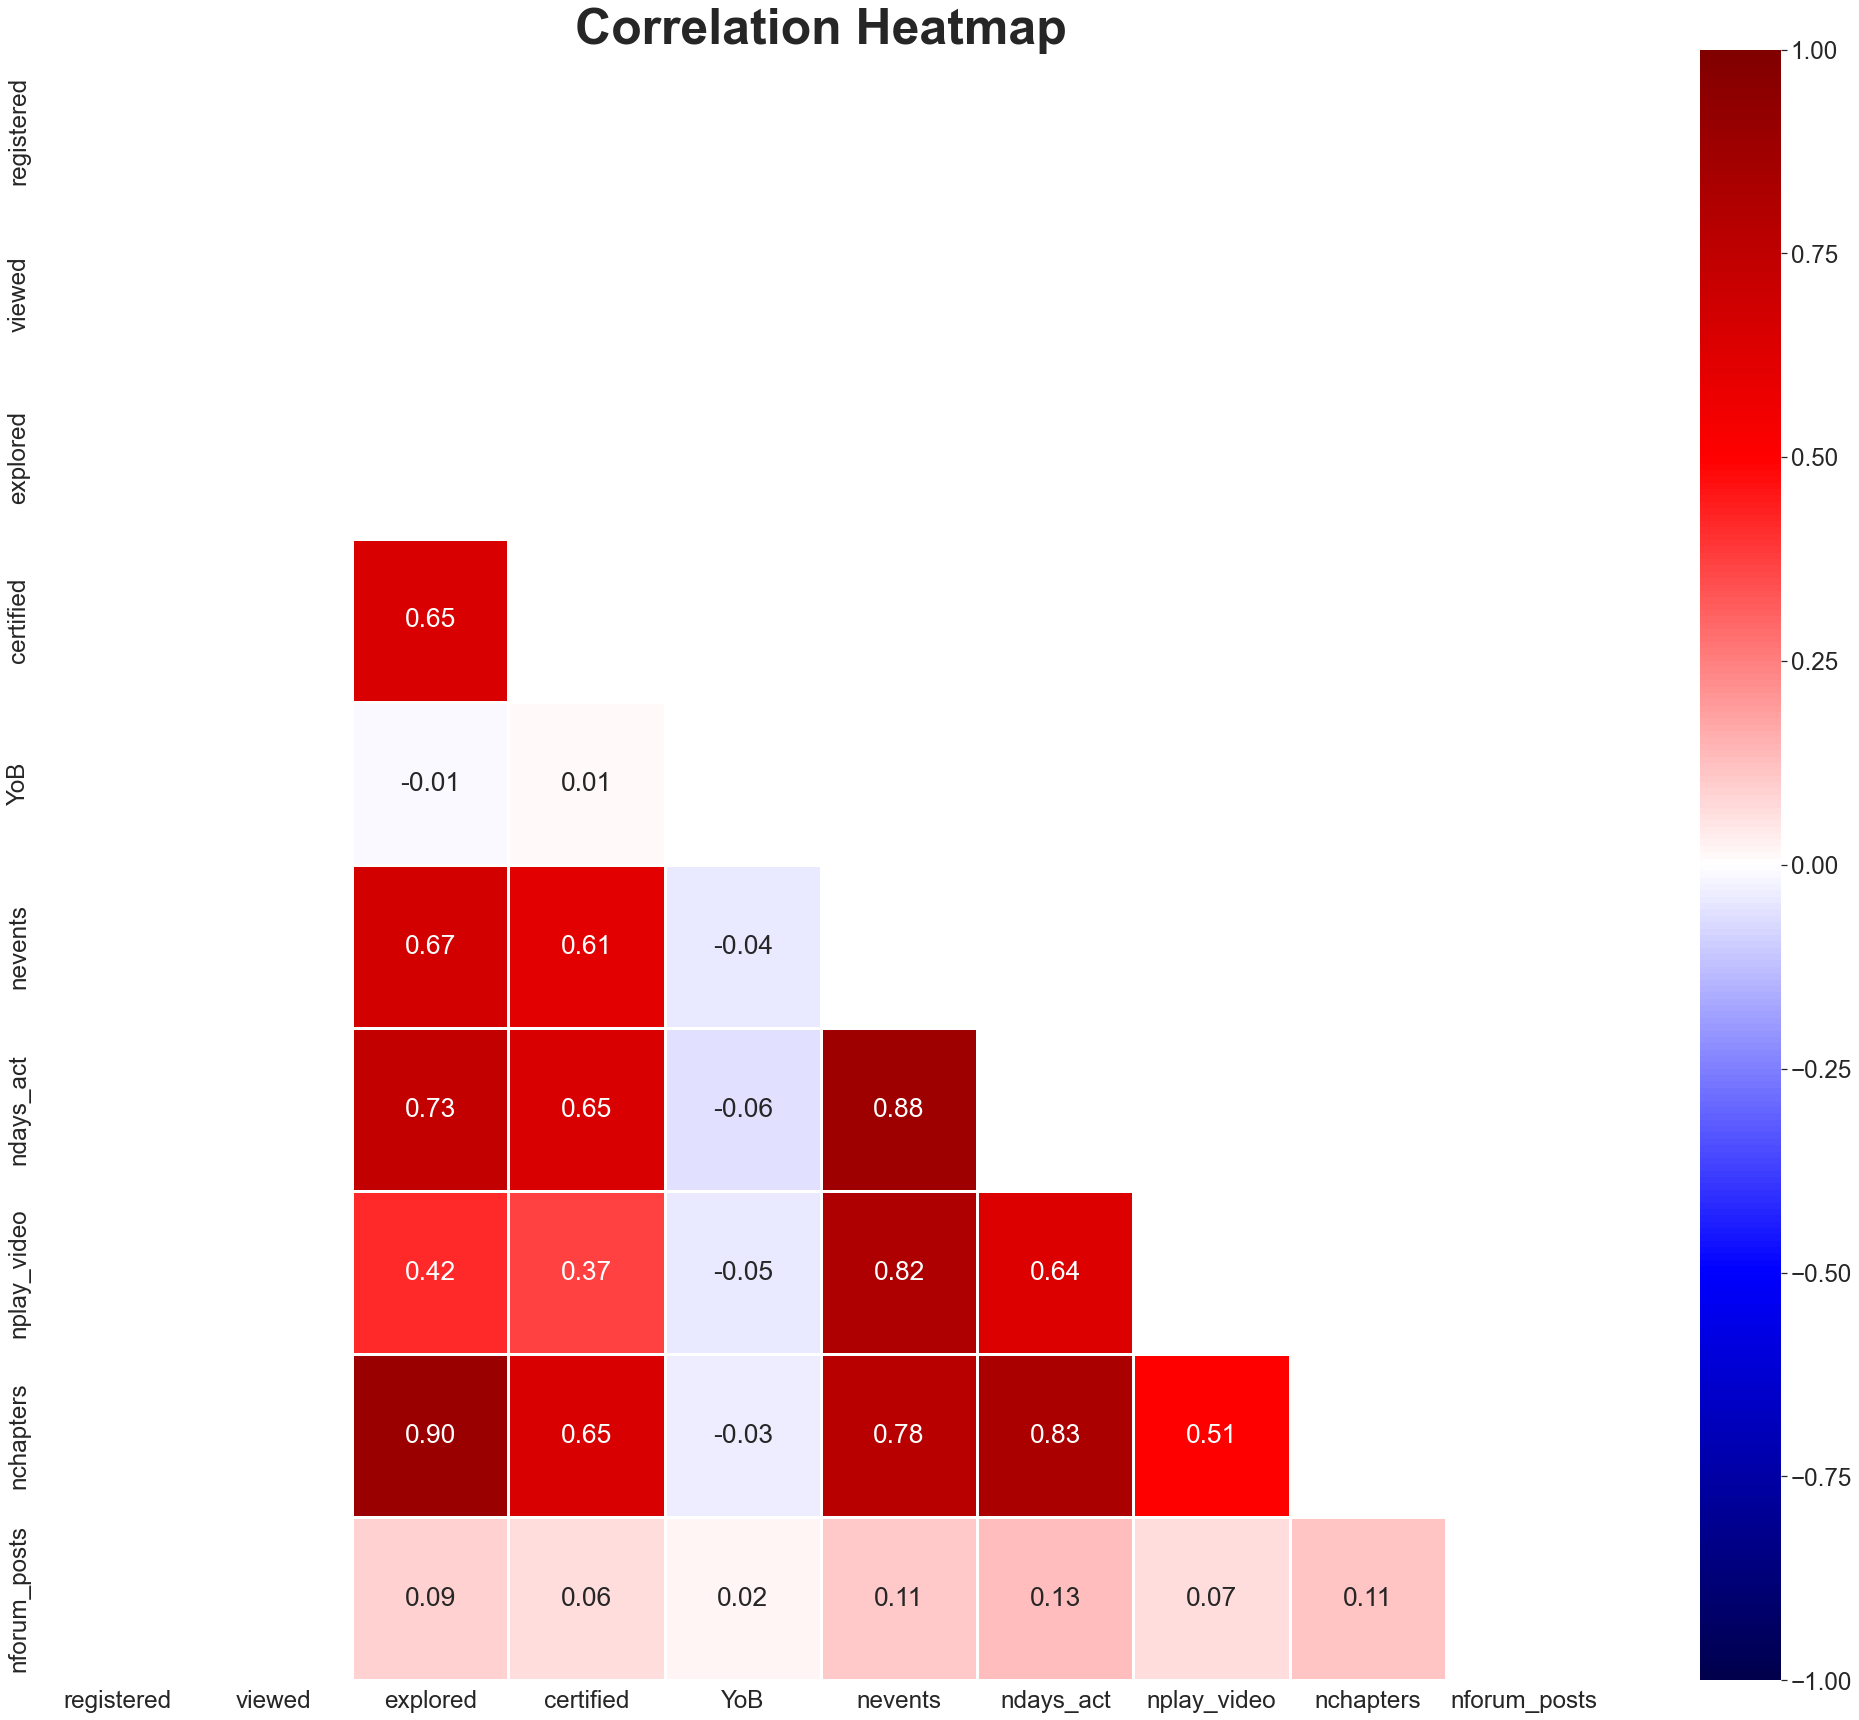

In [42]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

# Things to explore: random number
# Most likely need to drop random number 

In [ ]:
#Create new column with equation for length of time pursuing the course: start_time_DI	last_event_DI